In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Data

In [ ]:
iris = pd.read_csv("/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/iris.csv")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = iris.drop('species', axis = 1)
y = iris['species']

In [ ]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()

In [ ]:
y_encoded = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Creating Model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(units = 4, activation = 'relu', input_shape = [4, ]))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(patience = 10, monitor = 'val_loss')

In [ ]:
model.fit(x = scaled_X_train, y = y_train, epochs = 300, validation_data = (scaled_X_test, y_test), callbacks = [earlystop])

Epoch 1/300
4/4 [==============================] - 0s 47ms/step - loss: 1.4270 - accuracy: 0.3333 - val_loss: 1.3192 - val_accuracy: 0.3333
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 1.4153 - accuracy: 0.3333 - val_loss: 1.3101 - val_accuracy: 0.3333
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 1.4030 - accuracy: 0.3333 - val_loss: 1.3015 - val_accuracy: 0.3333
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 1.3921 - accuracy: 0.3333 - val_loss: 1.2931 - val_accuracy: 0.3333
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 1.3815 - accuracy: 0.3333 - val_loss: 1.2848 - val_accuracy: 0.3333
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 1.3705 - accuracy: 0.3333 - val_loss: 1.2768 - val_accuracy: 0.3333
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 1.3598 - accuracy: 0.3333 - val_loss: 1.2690 - val_accuracy: 0.3333
Epoch 8/300
4/4 [=========

## Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.427003,0.333333,1.319153,0.333333
1,1.415299,0.333333,1.310150,0.333333
2,1.402979,0.333333,1.301546,0.333333
3,1.392121,0.333333,1.293073,0.333333
4,1.381528,0.333333,1.284819,0.333333


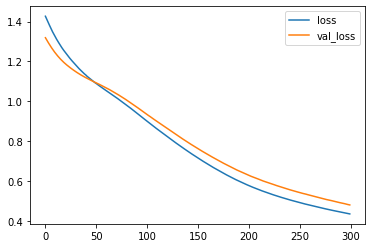

In [ ]:
metrics[['loss', 'val_loss']].plot()

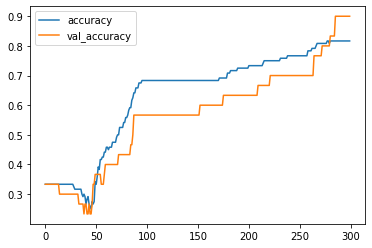

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(scaled_X_test, y_test, verbose = 0)

[0.4790991246700287, 0.8999999761581421]

## Training on all Data

In [ ]:
epochs = 300

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
model = Sequential()

model.add(Dense(units = 4, activation = 'relu', input_shape = [4, ]))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(scaled_X, y_encoded, epochs = epochs)

Epoch 1/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0781 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0750 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0720 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0689 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0661 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0630 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0602 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0573 - accuracy: 0.3333
Epoch 9/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.3333
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0521 - accuracy: 0.3333
Epoch 11/300
5/5 [===========

In [ ]:
model.save("/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/final_iris_model.h5")

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler, "/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/iris_scaler.pkl")

['/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/iris_scaler.pkl']

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
flower_model = load_model("/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/final_iris_model.h5")

In [ ]:
flower_scaler = joblib.load("/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/iris_scaler.pkl")

## Creating a Prediction Function

In [ ]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
flower_example = {"sepal_length": 5.1,
                  "sepal_width": 3.5,
                  "petal_length": 1.4,
                  "petal_width": 0.2}

In [ ]:
def return_prediction(model, scaler, sample_json):

  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = [[s_len, s_wid, p_len, p_wid]]

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  flower = scaler.transform(flower)

  class_ind = np.argmax(model.predict(flower), axis = 1)[0]

  return classes[class_ind]

In [ ]:
return_prediction(flower_model, flower_scaler, flower_example)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


'setosa'

# Code For Deployment

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np


flower_model = load_model("/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/final_iris_model.h5")
flower_scaler = joblib.load("/drive/MyDrive/Colab Notebooks/Deep Learning Course (Jose Portilia)/10. Deployment/iris_scaler.pkl")

def return_prediction(model, scaler, sample_json):

  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = [[s_len, s_wid, p_len, p_wid]]

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  flower = scaler.transform(flower)

  class_ind = np.argmax(model.predict(flower), axis = 1)[0]

  return classes[class_ind]